In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [7]:
data = load_digits()
digit_data = pd.DataFrame(data.data, columns = data.feature_names)

digit_data['target'] = data.target

In [8]:
digit_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [77]:
print(len(data.data[0]))

64


In [84]:
number_zero = data.data[0].reshape(8, 8)
number_one = data.data[1].reshape(8, 8)
number_two = data.data[2].reshape(8, 8)
number_three = data.data[3].reshape(8, 8)
number_four = data.data[4].reshape(8, 8)
print(number_one)

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


<Figure size 640x480 with 0 Axes>

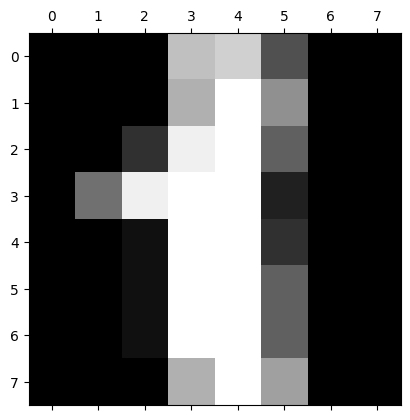

In [86]:
import matplotlib.pyplot as plt


plt.gray()
plt.matshow(number_one)

In [9]:
digit_data.shape

(1797, 65)

In [10]:
digit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [11]:
digit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
pixel_7_7,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


In [45]:
x = digit_data.drop(columns = ['target'], axis = 1)
y = digit_data['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

In [47]:
y_train.shape

(1437,)

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [49]:
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [50]:
print(X_train.shape)

(1437, 64)


In [51]:
pca = PCA(0.95)

pca.fit(X_train)

,n_components,0.95
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [52]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [53]:
print(X_train_pca.shape)

(1437, 40)


In [54]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
y_predict = model.predict(X_test_pca)

print(accuracy_score(y_test, y_predict))

0.9611111111111111


In [56]:
new_model = LogisticRegression()

In [60]:
params = {
    'max_iter' : [100, 1000, 10000],
    'C' : [0.01, 0.1, 1, 10, 100],
}

In [61]:
grid_search = GridSearchCV(new_model, params, cv =5)

grid_search.fit(X_train_pca, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 1000, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [63]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'C': 0.1, 'max_iter': 100}
LogisticRegression(C=0.1)
0.9554563492063493


Using The Pipeline

In [66]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(max_iter=1000))
])
params = {
    'pca__n_components': [0.80, 0.90, 0.95],
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}


hyper_params = GridSearchCV(pipe, params, cv = 5)

hyper_params.fit(x_train, y_train)

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'logreg__C': [0.01, 0.1, ...], 'pca__n_components': [0.8, 0.9, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [67]:
print(hyper_params.best_estimator_)
print(hyper_params.best_params_)
print(hyper_params.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('logreg', LogisticRegression(C=0.1, max_iter=1000))])
{'logreg__C': 0.1, 'pca__n_components': 0.95}
0.9547619047619047


In [68]:
new_model1 = LogisticRegression(C =0.1, max_iter = 1000)

new_model1.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [69]:
y_pred = new_model1.predict(X_test_pca)

In [70]:
print(y_pred)

[6 9 3 7 2 2 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 5 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 8 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 1 5 5 1 4 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 9 8 7 4 3 8 3 5]


In [71]:
print(accuracy_score(y_test, y_pred))

0.9611111111111111


In [72]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1437, 40)
(360, 40)


In [87]:
print(len(y_pred))

360


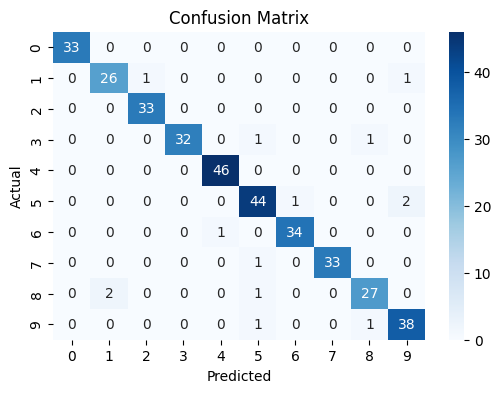

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
